In [1]:
import os
import tarfile
import urllib

In [2]:
download_root="https://raw.githubusercontent.com/ageron/handson-ml2/master/" # website where data is present at
housing_path=os.path.join("datasets","housing") # makes a housing path directory in your current directory
housing_url=download_root+"datasets/housing/housing.tgz" # directory where the data is stored at9

In [3]:
# Function for specifying the github repsitory name, branch etc and combining all these details inside the function
def fetch_housing_data(house_url=housing_url,house_path=housing_path):
    if not os.path.isdir(house_path): #if the directory mentioned in the above cell is not present 
        os.makedirs(house_path) #then it will make that directory
    tgz_path=os.path.join(house_path,"housing.tgz") 
    urllib.request.urlretrieve(house_url,tgz_path) 
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=house_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()# Calling the function to get the compressed file and extracting the csv file from it
# The extracted file will be stored in the housing subfolder of datasets folder(automatically created)

In [5]:
# loading the extracted csv file into the notebook
import pandas as pd

def load_housing_data(house_path=housing_path):
    csv_path=os.path.join(house_path,"housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


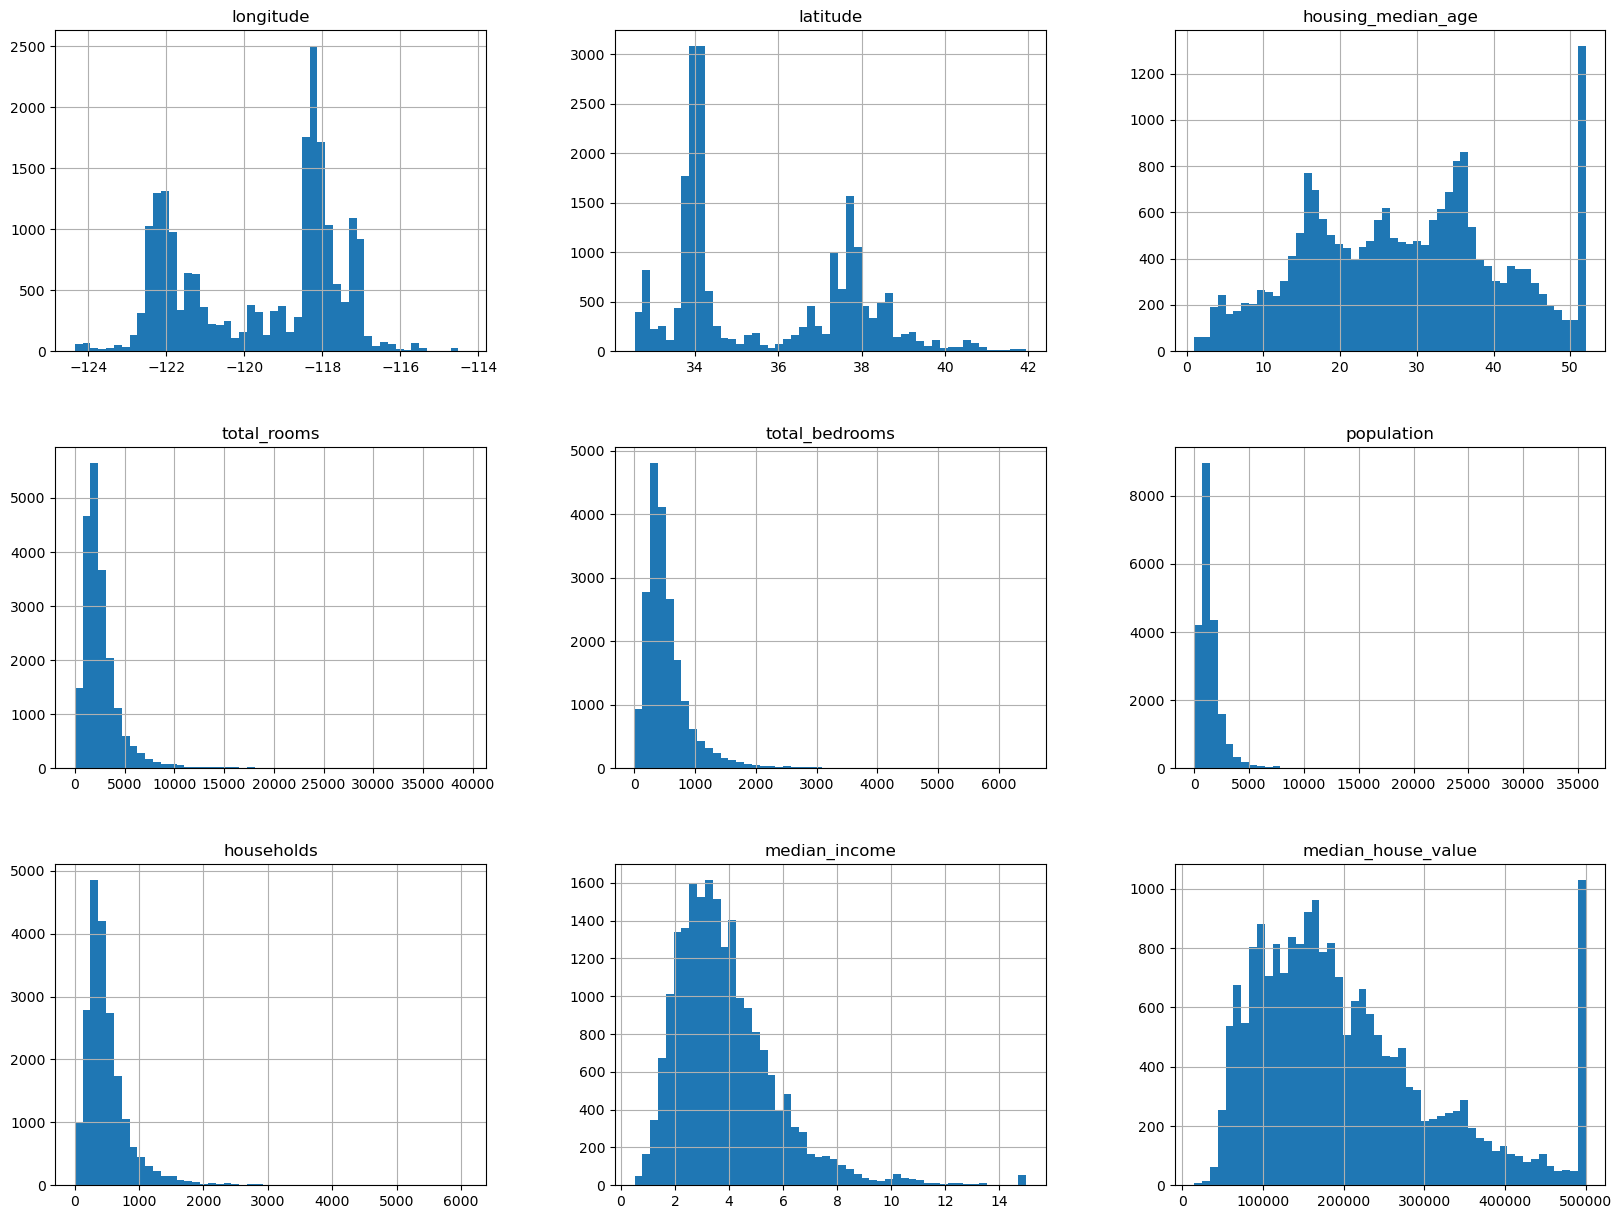

In [9]:
# This signifies that all the plots should be shown in jupyter itself and not an exteranl app
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15)) # bins = no of intervals, figsize = width and height of the image
plt.show()

In [10]:
housing['ocean_proximity'].value_counts();

In [11]:
# Here it is randomly picking different rows without having any biases and splitting the data into training and testing
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
# we are splitting into 80:20 ratio
#random_state makes sure that every time a split occurs it is constant i.e., the test and train data don't get shuffled

<AxesSubplot:>

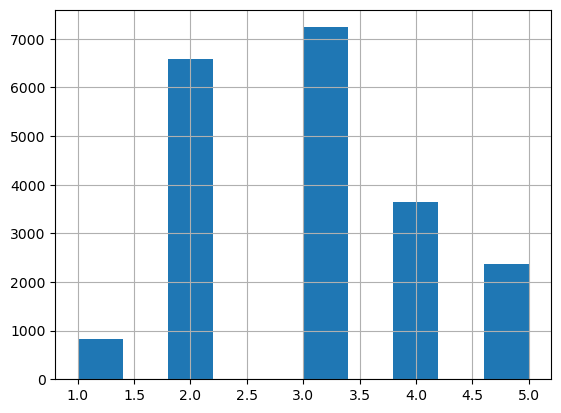

In [12]:
import numpy as np
# pd.cut just changes the values from a continous range to a qualitative value(i.e., a category) specified in the label
# bin is just categoring the value like from 0-1.5,1.5-3 and so on
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
# stratified shuffling on the basis of income
# split will contain how the stratified split should be done i.e., should be split only once in 80 20 ratio and should be constant
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# Now .split(dataset,based on) will return the indexes of the training set and testing set from the index
# we are iterating through it and storing the rows int strat_train_set and strat_test_set
for train_index,test_index, in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


In [14]:
strat_train_set["income_cat"].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

In [15]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [16]:
# removing the income category attribute to return the data to its original state
for set_ in(strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

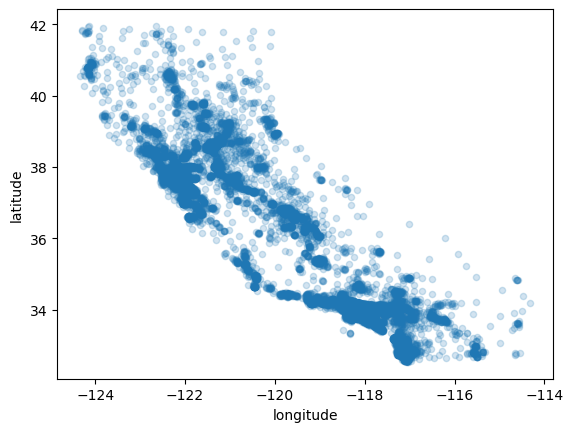

In [17]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.2)
# aplha makes the more dense part of plot more visible as compared to others

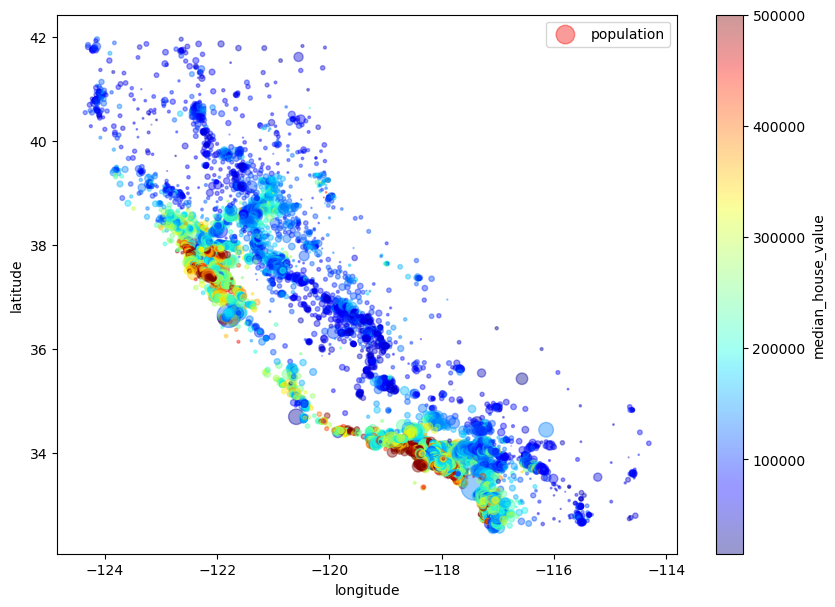

In [18]:
# This is just for visualizing the data using colormap where the circle represents the district population(s) 
# Using the jet colormap to make it more appealing hence to make it look like red = high and blue = low
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
# From this image we can tell that the housing price is very much related to the location
# Beachside properties have more values than inner land properties

In [19]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [20]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedroom_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [21]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroom_per_room           -0.255880
Name: median_house_value, dtype: float64

In [22]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")# The imputer will store the median value of each attribute

In [23]:
housing_num=housing.drop("ocean_proximity",axis=1)# dropping the ocean_proximity due to it being a categorical value

In [24]:
imputer.fit(housing_num)# calculating the median of each attribute

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_ # The medians of all the attributes are being stored inside statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  3.00000000e+00,  5.22912879e+00,  2.03162434e-01,
        2.81811565e+00])

In [26]:
X=imputer.transform(housing_num)# this will replace all the misssing values with their respective attributes median value and save it in X

In [27]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)# Converting it into a dataframe

In [28]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedroom_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467


In [29]:
housing_cat=housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [30]:
from sklearn.preprocessing import OneHotEncoder # Categorizing on the basis of how far or how close it is to the ocean
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [31]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [32]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr=num_pipeline.fit_transform(housing_num)